In [2]:
import os
import numpy as np
import time
from scipy.special import erfinv
from numpy import log, pi,sqrt, exp,cos,sin,tan,argpartition,copy,trapz,mean,cov,vstack,hstack
import matplotlib.pyplot as plt
import random
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [23]:
def dataload(data):
    Pk0 = [[],[]]
    Pk2 = [[],[]]
    k = data[0,:,1]
    l0 = data[:,:,3]
    l2 = data[:,:,4]
    Pk0[0] = np.mean(l0,axis=0)
    Pk0[1] = np.std(l0,axis=0)
    Pk2[0] = np.mean(l2,axis=0)
    Pk2[1] = np.std(l2,axis=0)
    pk_cov = np.append(l0,l2,axis=1)
    cov = np.cov(np.array(pk_cov).T)
    # icov = np.linalg.inv(cov)
    return (k,Pk0,Pk2, cov)

def Pkload(catalogue, r_pk, redshift):
    # load the QUIJOTE observation
    tool = 'Pypower' # Powspec, Pypower, NCV
    Ddir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/{catalogue}/{r_pk}_z{redshift}/pk'
    data = []
    nb = np.arange(100,200,1)
    for h in nb:
        realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        data.append(realisation)
    print(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
    (kev, pk0, pk2, icov) = dataload(np.array(data))
    pkl = [kev, pk0, pk2, icov]
    return pkl

/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/pk/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/Mnu_p/RSD_z1.0/pk/Mnu_p_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/Mnu_ppp/RSD_z1.0/pk/Mnu_ppp_199_z1.0.pk


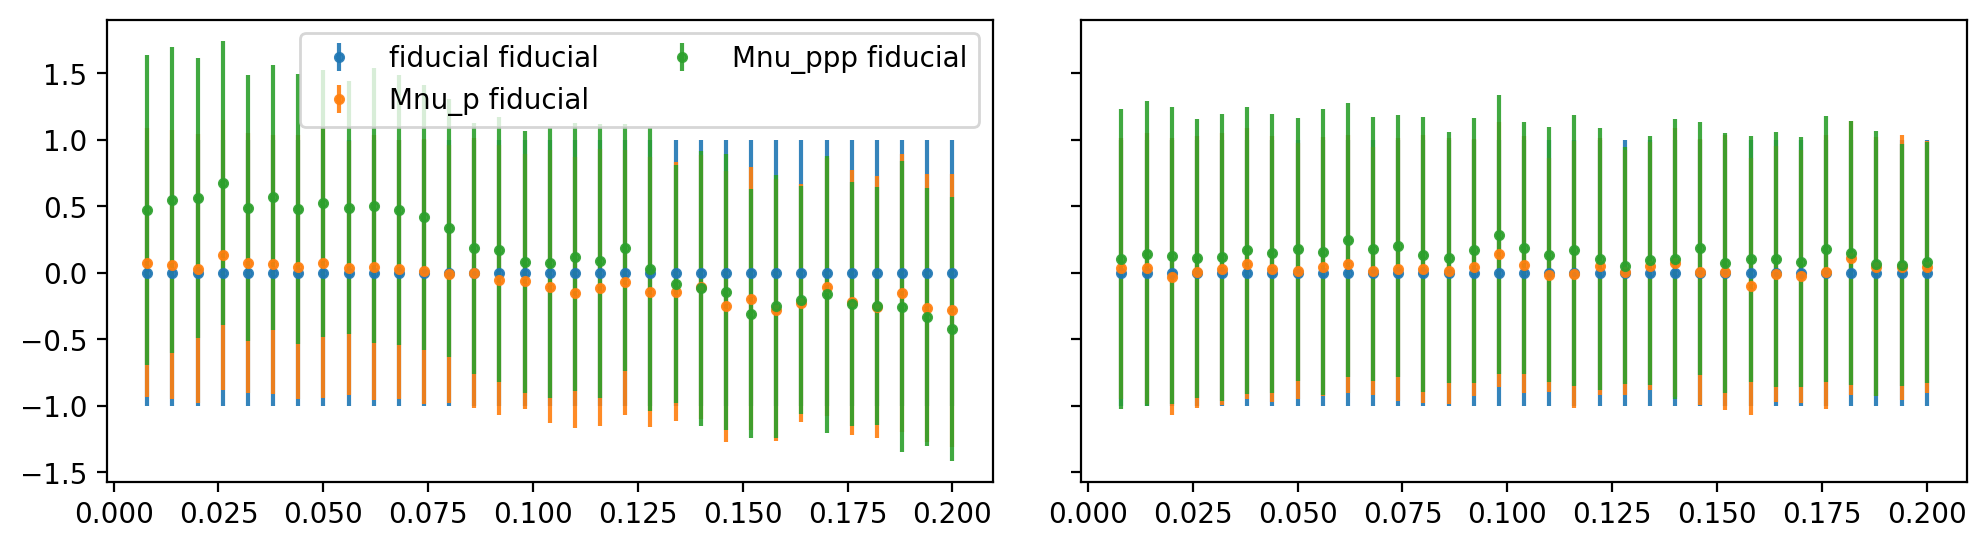

In [24]:
systematic_map  = {
    'RSD': 'fiducial',
    'LRG': '+LRGvsmear',
    'QSO': '+QSOvsmear',
    '1%CATAS': '+1%vcatas',
    '5%CATAS': '+5%vcatas'
    }

redshift = 1.0

rsf = 5

label_fontsize = 13
fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize = (12, 3))
fig.subplots_adjust(wspace=0.1)
for r_pk in ['RSD']:
    if r_pk == 'RSD':
        colors = ['C0', 'C1','C2']
    Pkobs   = []
    labels  = []
    for t,catalogue in enumerate(['fiducial','Mnu_p','Mnu_ppp']):
        systematic = systematic_map.get(r_pk, '')
        [k_ev, pk0, pk2, cov] = Pkload(catalogue, r_pk, redshift)
        Pkobs.append([pk0, pk2])
        labels.append(f'{catalogue} {systematic}')
        if t == 0 and catalogue == 'fiducial':
            rsf = 5
            klen = len(k_ev)
            ref =  [i[0] for i in [pk0, pk2]] 
            errbar = [i[1] for i in [pk0, pk2]]
    for ell, l in zip(['monopole','quadrupole'],range(2)):
        values   = ref[l]      
        err   = k_ev*errbar[l]
        for t in range(len(Pkobs)):
            axs[l].errorbar(k_ev, k_ev*(Pkobs[t][l][0]-values)/err, k_ev*Pkobs[t][l][1]/err,
                            color = colors[t], fmt='.', alpha = 0.9, label = labels[t])
            # axs[l].errorbar(k_ev, k_ev*(Pkobs[t][l][0]), k_ev*Pkobs[t][l][1],
            #                 color = colors[t], fmt='.', alpha = 0.9, label = labels[t])
axs[0].legend(ncols=2)
# axs[-1,z].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]', fontsize = label_fontsize)
# plt.xlim([0.008,0.20])
# plt.ylim([-5,5])
# plt.figtext(0.38, 0.82, f'Z=0.5', fontsize=20)
# plt.figtext(0.80, 0.82, f'Z=1.0', fontsize=20)
plt.show()